In [1]:
from ddpg_agent import Agent
import nav2D_envs
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch
import glob
import os
import gym

%load_ext autoreload
%autoreload 2

In [2]:
base_path='experiments/'
files = glob.glob(base_path+"*")
max_file = max(files)
experiment_dir = base_path + "{:02d}_ppo".format(int(max_file.split('/')[-1].split('_')[0])+1)
os.mkdir(experiment_dir)
print(experiment_dir)
restore = None

experiments/20_ppo


In [3]:
env = gym.make('nav2D_envs/Nav2DWorld-v0')
print(env.state_size)
print(env.action_size)
agent = Agent(num_agents = env.num_agents, state_size=env.state_size, action_size=env.action_size, random_seed=2)


54
2
Creating 1 agents. Each observes a state with length: 54 and has an action space of size: 2


In [4]:
#Train the agent with DDPG
def ddpg(n_episodes=200000, max_t=1000, print_every=1000, target_score = 3.5):
    scores_deque = deque(maxlen=print_every)
    scores = []
    count_goal = 0
    
    for i_episode in range(1, n_episodes+1):
        states = env.reset()
        agent.reset()
        score = 0
        for t in range(max_t):
            actions = 10.0*(agent.act(states)[0])
            next_states, rewards, dones, _ = env.step(actions)
            
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += np.average(rewards)
            # print('\rstep: {}'.format(t), end="")
            
            if any(dones):
                if rewards[0]>1.0:
                    count_goal+=1
                #print("break after {} time steps".format(t))
                break 
        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\t count_goal:{}'.format(i_episode, np.mean(scores_deque),count_goal), end="")
        if i_episode % print_every == 0:
            count_goal = 0
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), experiment_dir + "/actor-"+str(i_episode)+".pth")
            torch.save(agent.critic_local.state_dict(), experiment_dir + "/critic-"+str(i_episode)+".pth")
            np.save(experiment_dir+"/scores_crawler.npz",np.array(scores))
            
        if (np.mean(scores_deque)>=target_score) and (len(scores_deque) > int(print_every/2)):
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), experiment_dir + "/actor_final.pth")
            torch.save(agent.critic_local.state_dict(), experiment_dir + "/critic_final.pth")
            np.save(experiment_dir+"/scores_crawler.npz",np.array(scores))
            break
     # Save Agent at the end of training
    torch.save(agent.actor_local.state_dict(), experiment_dir + "/actor.pth")
    torch.save(agent.critic_local.state_dict(), experiment_dir + "/critic.pth")
    return scores

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/src/app/rl/ddpg_agent.py:115: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1) # Gradient Clipping


Episode 1000	Average Score: 0.50	 count_goal:50
Episode 2000	Average Score: 0.47	 count_goal:47
Episode 3000	Average Score: 0.63	 count_goal:63
Episode 4000	Average Score: 0.49	 count_goal:49
Episode 5000	Average Score: 0.42	 count_goal:42
Episode 6000	Average Score: 0.49	 count_goal:49
Episode 7000	Average Score: 0.67	 count_goal:67
Episode 8000	Average Score: 0.49	 count_goal:49
Episode 9000	Average Score: 0.53	 count_goal:53
Episode 10000	Average Score: 0.57	 count_goal:57
Episode 11000	Average Score: 0.59	 count_goal:59
Episode 12000	Average Score: 0.57	 count_goal:57
Episode 13000	Average Score: 0.57	 count_goal:57
Episode 14000	Average Score: 0.53	 count_goal:53
Episode 15000	Average Score: 0.49	 count_goal:49
Episode 16000	Average Score: 0.51	 count_goal:51
Episode 17000	Average Score: 0.54	 count_goal:54
Episode 18000	Average Score: 0.54	 count_goal:54
Episode 19000	Average Score: 0.60	 count_goal:60
Episode 20000	Average Score: 0.54	 count_goal:54
Episode 21000	Average Score: 

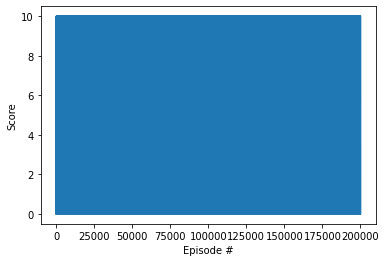

In [5]:
scores = ddpg()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



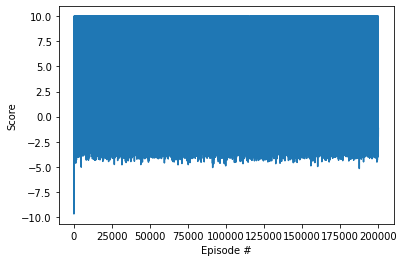

In [6]:
print(scores)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()